# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely

In [3]:
# Proportion of trips on this date as compared to Avg number of trips on the same day of week in baseline period i.e 1st

In [5]:
df = pd.read_csv("Archieved-Data/covid_impact_on_airport_traffic.csv")

In [6]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
5,Daily,2020-10-16,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
6,Daily,2020-06-01,1.0,Kingsford Smith,55,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
7,Daily,2020-06-18,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
8,Daily,2020-09-15,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
9,Daily,2020-08-10,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [7]:
countries = df.groupby(["Country"])["Country"].count().reset_index(name = "Count Country")

# Retrieve Long and Lat Coordiantes


In [8]:
def getLat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [9]:
def getLong(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

In [10]:
df["lat"] = df["Centroid"].map(getLat)
df["long"] = df["Centroid"].map(getLong)

In [11]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
5,Daily,2020-10-16,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
6,Daily,2020-06-01,1.0,Kingsford Smith,55,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
7,Daily,2020-06-18,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
8,Daily,2020-09-15,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
9,Daily,2020-08-10,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088


In [12]:
# split dataframe into USA and CA
canada = df.loc[df["Country"] == "Canada"]
usa = df.loc[df["Country"] == "United States of America (the)"]
temp = [usa, canada]
na = pd.concat(temp)

In [13]:
# cities in CA and USA
canadaCities = canada.groupby(["City"])["City"].count().reset_index(name = "Count City")
usaCities = usa.groupby(["City"])["City"].count().reset_index(name = "Count City")
naCities = na.groupby(["City"])["City"].count().reset_index(name = "Count City")

In [51]:
rankCA = rankCA.loc[['Vancouver International', 'Toronto Pearson', 'Calgary International', 'Montreal Trudeau']]

In [15]:
rankNA = na.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankCA = canada.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankUSA = usa.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")

In [52]:
rankCA

,Version,PercentOfBaseline,lat,long,geometry
AirportName,,,,,
Vancouver International,1.0,75.929907,49.193579,-123.177541,POINT (-123.17754 49.19358)
Toronto Pearson,1.0,56.042056,43.679352,-79.631344,POINT (-79.63134 43.67935)
Calgary International,1.0,88.084112,51.118475,-114.013123,POINT (-114.01312 51.11848)
Montreal Trudeau,1.0,71.162791,45.467844,-73.742412,POINT (-73.74241 45.46784)


# Plot Coordinates of Airports in North America

In [105]:
import contextily as ctx
# Refer to geopandas documentation: https://geopandas.org/gallery/create_geopandas_from_pandas.html
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [53]:
# Make 'Geometry' in NA dataframe; will have to refactor this later on (code is messy, have three cols of the same thing)
gdfca = gpd.GeoDataFrame(rankCA, geometry = gpd.points_from_xy(rankCA.long, rankCA.lat))

/home/aytang/.local/lib/python3.7/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


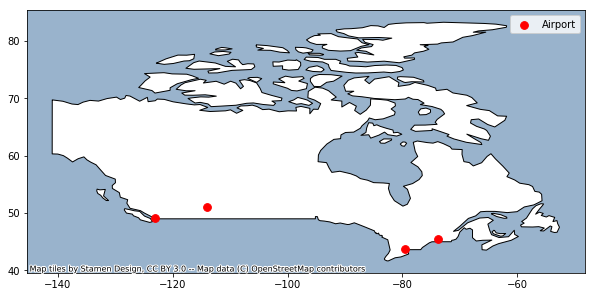

In [111]:
# Plot coordinates onto map of NA
ax = world[world.name == 'Canada'].plot(color='white', edgecolor='black', alpha = 1, figsize=(10, 10))
gdfca.plot(ax = ax, color = 'red', markersize = 60, label = 'Airport')
# ax.set_axis_off()
ctx.add_basemap(ax)
plt.savefig('graphs/canadaAirports.svg')
plt.legend()
#plt.show()

# Find Outliers 

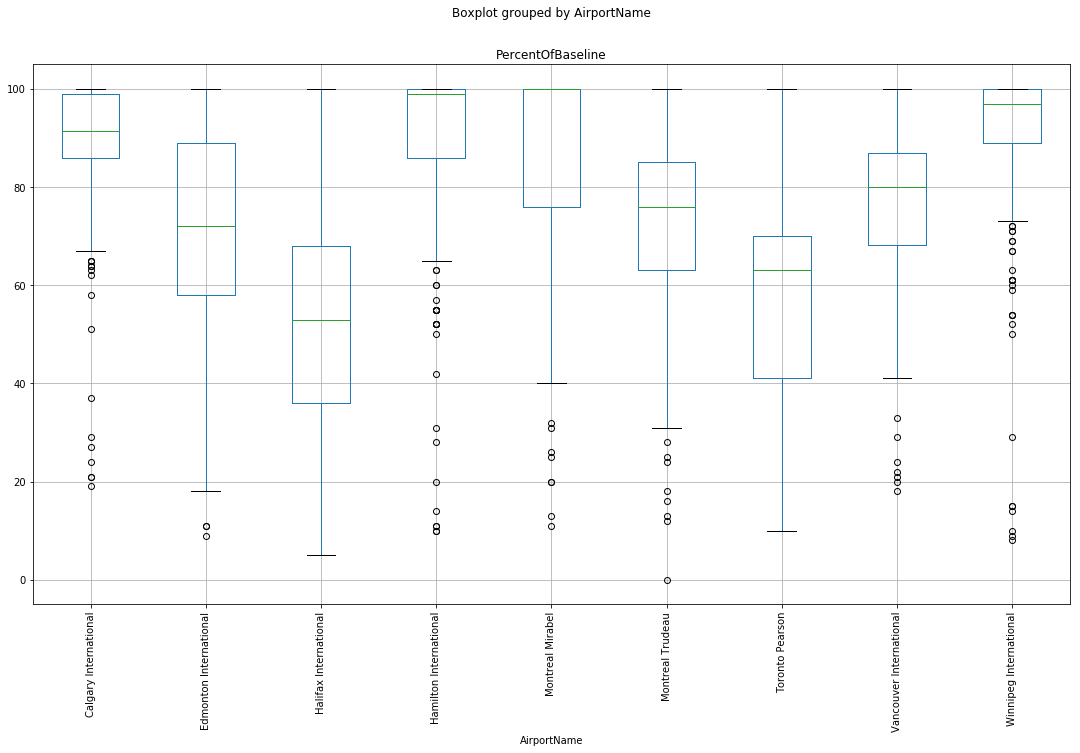

In [18]:
canada.boxplot(column = ['PercentOfBaseline'], by = 'AirportName', rot = 90, fontsize = 10, figsize = (18,10))

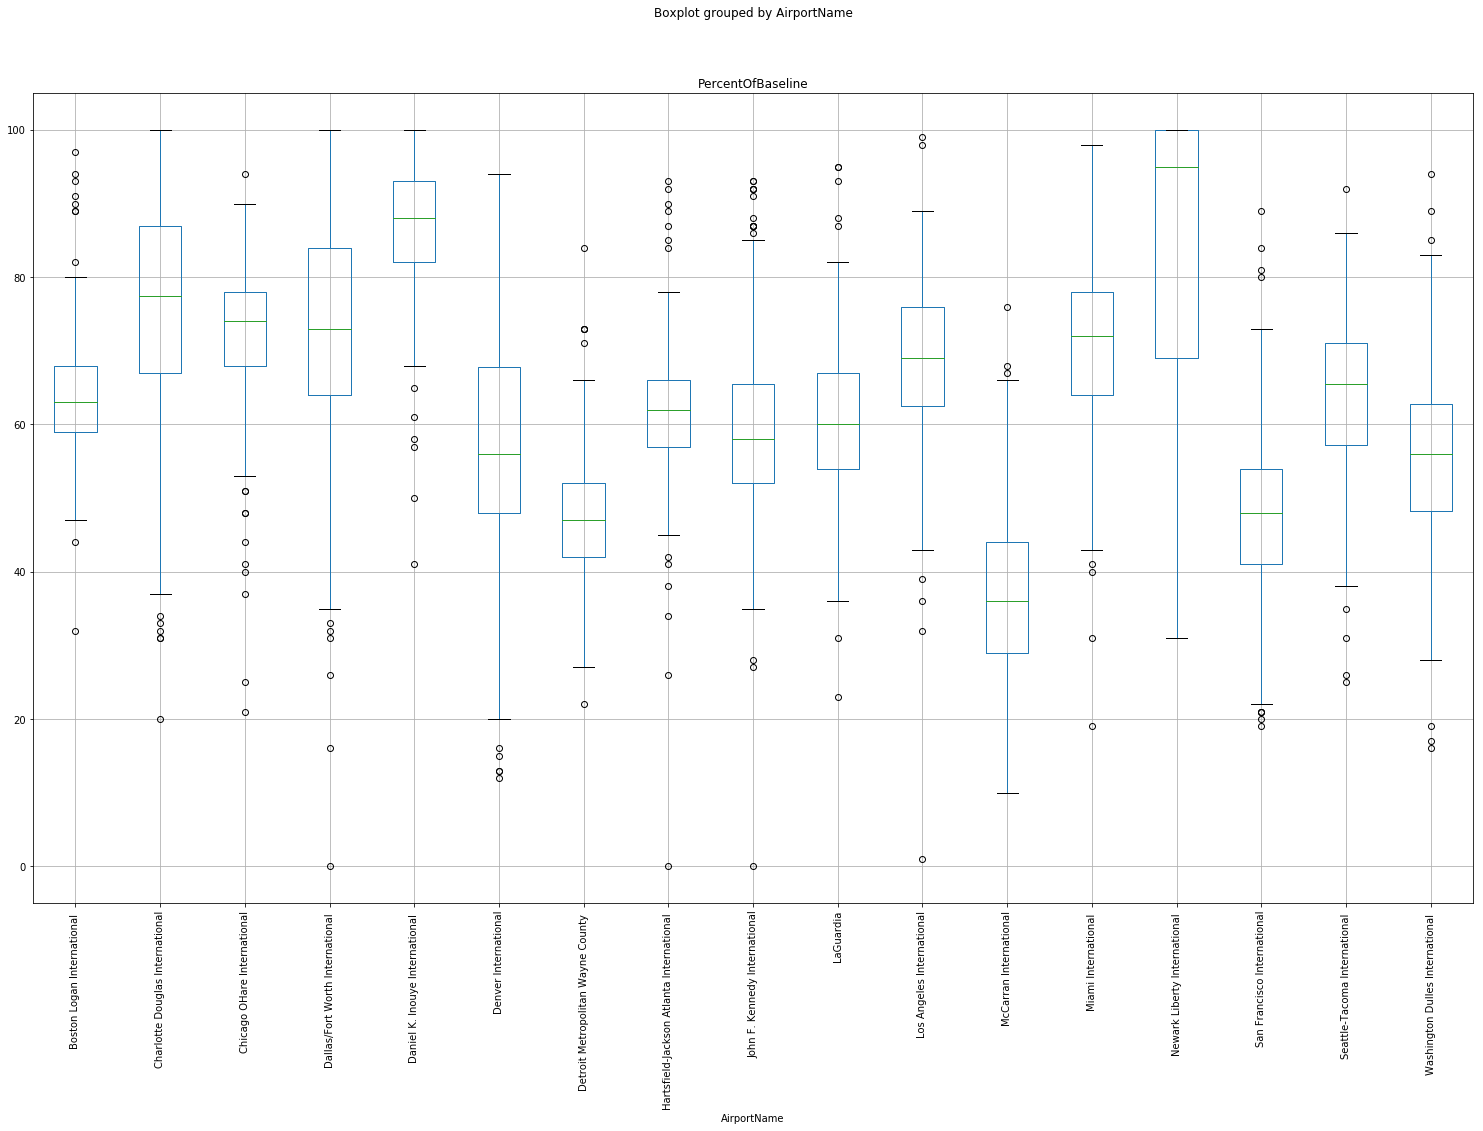

In [19]:
usa.boxplot(column = ['PercentOfBaseline'], by = 'AirportName', rot = 90, fontsize = 10, figsize = (25,15))

In [20]:
# Find monthly outliers of YVR 
canada['Date'] = pd.to_datetime(canada['Date'])
yvr = canada.loc[canada['AirportName'] == 'Vancouver International']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas/44908576
yvr.groupby(yvr['Date'].dt.strftime('%b'))['PercentOfBaseline'].mean().sort_values

<bound method Series.sort_values of Date
Apr    66.566667
Aug    76.066667
Jul    79.451613
Jun    78.666667
Mar    86.250000
May    69.806452
Oct    77.500000
Sep    78.766667
Name: PercentOfBaseline, dtype: float64>

Text(0.5, 0, '')

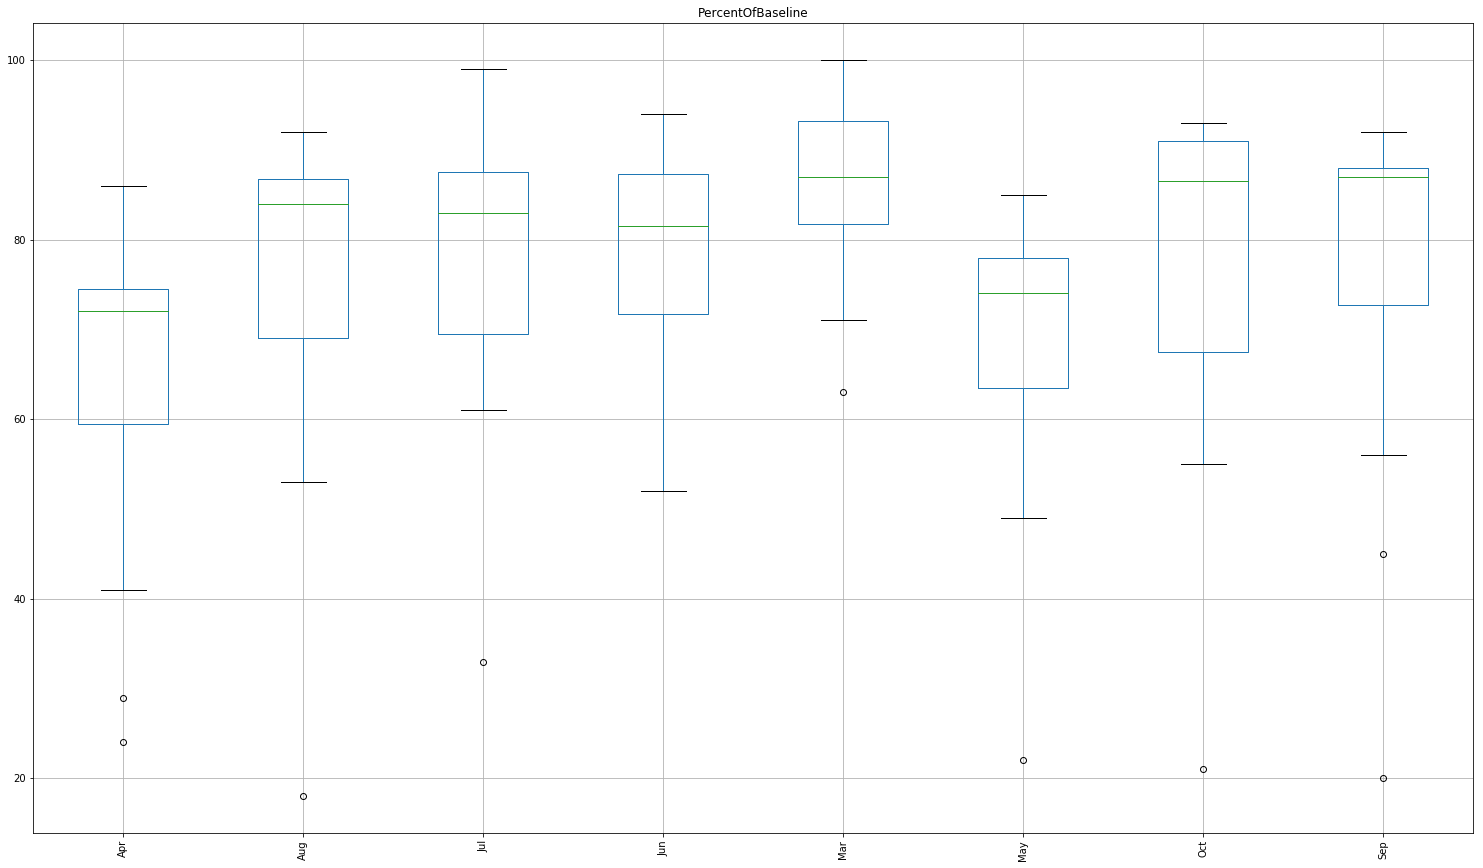

In [22]:
yvr.boxplot(column = ['PercentOfBaseline'], by = yvr['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")
# Repeat this for all NA airports?

#Exporting Daily numbers to CSV file

In [23]:
na.reset_index(inplace=True)
naDailyData = na[['Date', 'AirportName', 'PercentOfBaseline', 'City','State','Country', 'lat','long']]
naDailyData.to_csv('airport_traffic_NA.csv')

In [24]:
# https://ipython.readthedocs.io/en/stable/config/extensions/storemagic.html 
%store yvr
%store canada
%store usa
%store na
%store rankNA
%store rankUSA
%store rankCA
%store df

Stored 'yvr' (DataFrame)
Stored 'canada' (DataFrame)
Stored 'usa' (DataFrame)
Stored 'na' (DataFrame)
Stored 'rankNA' (DataFrame)
Stored 'rankUSA' (DataFrame)
Stored 'rankCA' (DataFrame)
Stored 'df' (DataFrame)
